# Homework III

Gonçalo Bárias (ist1103124) & Raquel Braunschweig (ist1102624)

This Notebook only contains our solution for the programming and critical analysis section of the Homework (Part II). Our solution for the pen and paper section (Part I) can be found on the pdf report.

## I. Pen and Paper [12v]

### 2) [6v]

In [16]:
import numpy as np

# Define variables
W1 = np.array([[1, 1, 1, 1], [1, 1, 2, 1], [1, 1, 1, 1]])
b1 = np.array([[1], [1], [1]])

W2 = np.array([[1, 4, 1], [1, 1, 1]])
b2 = np.array([[1], [1]])

W3 = np.array([[1, 1], [3, 1], [1, 1]])
b3 = np.array([[1], [1], [1]])

x1 = np.array([[1], [1], [1], [1]])
x2 = np.array([[1], [0], [0], [-1]])

# Define the activation function
def activation_function(x):
    return np.tanh(0.5 * x - 2)

In [17]:
# Step 1: Forward Pass

#for x1
z1_1 = np.dot(W1, x1) + b1
a1_1 = activation_function(z1_1)

z2_1 = np.dot(W2, a1_1) + b2
a2_1 = activation_function(z2_1)

z3_1 = np.dot(W3, a2_1) + b3
a3_1 = activation_function(z3_1)

#for x2
z1_2 = np.dot(W1, x2) + b1
a1_2 = activation_function(z1_2)

z2_2 = np.dot(W2, a1_2) + b2
a2_2 = activation_function(z2_2)

z3_2 = np.dot(W3, a2_2) + b3
a3_2 = activation_function(z3_2)

print("Results with 5 decimals:")
print("Forward Pass for x1:")
print("z1:")
print(z1_1)
print("a1:")
print(np.round(a1_1, 5))
print("z2:")
print(np.round(z2_1, 5))
print("a2:")
print(np.round(a2_1, 5))
print("z3:")
print(np.round(z3_1, 5))
print("a3:")
print(np.round(a3_1, 5))

Results with 5 decimals:
Forward Pass for x1:
z1:
[[5]
 [6]
 [5]]
a1:
[[0.46212]
 [0.76159]
 [0.46212]]
z2:
[[4.97061]
 [2.68583]]
a2:
[[ 0.45048]
 [-0.57642]]
z3:
[[0.87406]
 [1.77503]
 [0.87406]]
a3:
[[-0.9159 ]
 [-0.80494]
 [-0.9159 ]]


In [18]:

print("Results with 5 decimals:")
print("Forward Pass for x2:")
print("z1:")
print(np.round(z1_2, 5))
print("a1:")
print(np.round(a1_2, 5))
print("z2:")
print(np.round(z2_2, 5))
print("a2:")
print(np.round(a2_2, 5))
print("z3:")
print(np.round(z3_2, 5))
print("a3:")
print(np.round(a3_2, 5))

Results with 5 decimals:
Forward Pass for x2:
z1:
[[1]
 [1]
 [1]]
a1:
[[-0.90515]
 [-0.90515]
 [-0.90515]]
z2:
[[-4.43089]
 [-1.71544]]
a2:
[[-0.99956]
 [-0.99343]]
z3:
[[-0.993  ]
 [-2.99212]
 [-0.993  ]]
a3:
[[-0.98652]
 [-0.99816]
 [-0.98652]]


In [24]:
# Step 2: Backpropagation

# Define the derivative function
def derivative_function(x):
    return np.square(1 / np.cosh(0.5 * x - 2)) * 0.5

z_1 =  np.array([[-1], [1], [-1]])
z_2 =  np.array([[1], [-1], [-1]])

delta3_1 = np.multiply(a3_1 - z_1, derivative_function(z3_1))
delta2_1 = np.multiply(np.dot(W3.T, delta3_1), derivative_function(z2_1))
delta1_1 = np.multiply(np.dot(W2.T, delta2_1), derivative_function(z1_1))

print("Backpropagation for x1")
print("Delta 3:")
print(np.round(delta3_1, 5))
print("Delta 2:")
print(np.round(delta2_1, 5))
print("Delta 1:")
print(np.round(delta1_1, 5))

delta3_2 = np.multiply(a3_2 - z_2, derivative_function(z3_2))
delta2_2 = np.multiply(np.dot(W3.T, delta3_2), derivative_function(z2_2))
delta1_2 = np.multiply(np.dot(W2.T, delta2_2), derivative_function(z1_2))

print("Backpropagation for x2")
print("Delta 3:")
print(np.round(delta3_2, 5))
print("Delta 2:")
print(np.round(delta2_2, 5))
print("Delta 1:")
print(np.round(delta1_2, 5))


Backpropagation for x1
Delta 3:
[[ 0.00678]
 [-0.31773]
 [ 0.00678]]
Delta 2:
[[-0.37448]
 [-0.10156]]
Delta 1:
[[-0.18719]
 [-0.33587]
 [-0.18719]]
Backpropagation for x2
Delta 3:
[[-0.0266 ]
 [ 0.     ]
 [ 0.00018]]
Delta 2:
[[-1.0e-05]
 [-1.7e-04]]
Delta 1:
[[-1.66619254e-05]
 [-1.97816249e-05]
 [-1.66619254e-05]]


In [26]:
# Caculate derivatives

deriv_3 = np.dot(delta3_1, a2_1.T) + np.dot(delta3_2, a2_2.T)
deriv_2 = np.dot(delta2_1, a1_1.T) + np.dot(delta2_2, a1_2.T)
deriv_1 = np.dot(delta1_1, x1.T) + np.dot(delta1_2, x2.T)

print("3")
print(np.round(deriv_3, 5))
print("2")
print(np.round(deriv_2, 5))
print("1")
print(np.round(deriv_1, 5))

3
[[ 0.02964  0.02252]
 [-0.14314  0.18315]
 [ 0.00287 -0.00408]]
2
[[-0.17304 -0.28519 -0.17304]
 [-0.04678 -0.07719 -0.04678]]
1
[[-0.18721 -0.18719 -0.18719 -0.18717]
 [-0.33589 -0.33587 -0.33587 -0.33585]
 [-0.18721 -0.18719 -0.18719 -0.18717]]


In [30]:
# Final step: calculate new weights and bias

W1_new = W1 - 0.1 * deriv_1
W2_new = W2 - 0.1 * deriv_2
W3_new = W3 - 0.1 * deriv_3

b1_new = b1 - 0.1 * (delta1_1 + delta1_2) 
b2_new = b2 - 0.1 * (delta2_1 + delta2_2) 
b3_new = b3 - 0.1 * (delta3_1 + delta3_2) 

print("For 1:")
print(np.round(W1_new, 5))
print(np.round(b1_new, 5))
print("For 2:")
print(np.round(W2_new, 5))
print(np.round(b2_new, 5))
print("For 3:")
print(np.round(W3_new, 5))
print(np.round(b3_new, 5))

For 1:
[[1.01872 1.01872 1.01872 1.01872]
 [1.03359 1.03359 2.03359 1.03359]
 [1.01872 1.01872 1.01872 1.01872]]
[[1.01872]
 [1.03359]
 [1.01872]]
For 2:
[[1.0173  4.02852 1.0173 ]
 [1.00468 1.00772 1.00468]]
[[1.03745]
 [1.01017]]
For 3:
[[0.99704 0.99775]
 [3.01431 0.98169]
 [0.99971 1.00041]]
[[1.00198]
 [1.03177]
 [0.9993 ]]


## II. Programming and critical analysis [8v]

**Consider the `winequality-red.csv` dataset (available at the webpage) where the goal is to estimate
the quality (sensory appreciation) of a wine based on physicochemical inputs.**

**Using a 80-20 training-test split with a fixed seed (`random_state=0`), you are asked to learn MLP
regressors to answer the following questions.**

**Given their stochastic behavior, average the performance of each MLP from 10 runs
(for reproducibility consider seeding the MLPs with `random_state` ∈ {1..10}).**

### 1) [3v]

**Learn a MLP regressor with 2 hidden layers of size 10, rectifier linear unit activation
on all nodes, and early stopping with 20% of training data set aside for validation. All
remaining parameters (e.g., loss, batch size, regularization term, solver) should be set as
default. Plot the distribution of the residues (in absolute value) using a histogram.**

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [3]:
# Step 1: Load and prepare the dataset
data = pd.read_csv('./data/winequality-red.csv', sep=';')  # Specify the delimiter as ';'
X = data.drop('quality', axis=1)
y = data['quality']

In [4]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Step 3: Define and train the MLP regressor
mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True,
                             validation_fraction=0.2, random_state=0)

# Step 4: Repeat the training process 10 times
num_runs = 10
mae_scores = []

for seed in range(1, num_runs + 1):
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True,
                                 validation_fraction=0.2, random_state=seed)
    mlp_regressor.fit(X_train, y_train)
    y_pred = mlp_regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

/home/kelli_linux/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kelli_linux/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kelli_linux/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kelli_linux/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kelli_linux/.local/lib/pyt

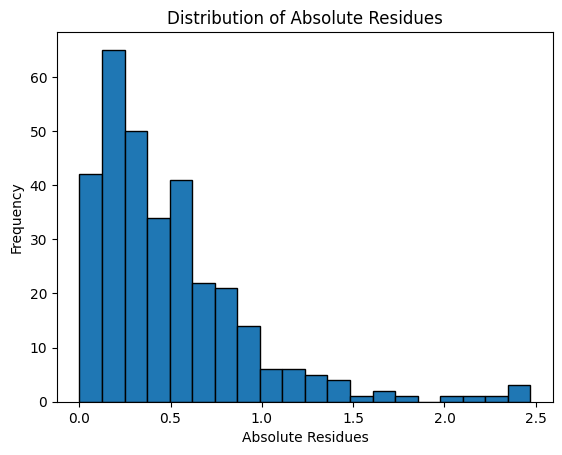

Average MAE over 10 runs: 0.5097171955009514


In [5]:
# Step 5: Plot the distribution of the absolute residues
residues = np.abs(y_test - y_pred)
plt.hist(residues, bins=20, edgecolor='k')
plt.xlabel('Absolute Residues')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Residues')
plt.show()

# Print the average MAE
average_mae = np.mean(mae_scores)
print(f'Average MAE over {num_runs} runs: {average_mae}')

### 2) [1.5v]

**Since we are in the presence of a
_integer regression_ task, a recommended trick is to
round and bound estimates. Assess the impact of these operations on the MAE of the MLP
learnt in previous question.**

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error

# Step 1: Train the MLP regressor as previously instructed
# (Make sure you have already executed the code to train the MLP regressor)

# Step 2: Predict the target values on the test set
y_pred = mlp_regressor.predict(X_test)

# Step 3: Apply rounding and bounding operations
y_pred_rounded = np.round(y_pred)  # Round the predictions
y_pred_bounded = np.clip(y_pred, 3, 8)  # Bound the predictions between 3 and 8

# Step 4: Calculate MAE for both rounded and bounded predictions
mae_rounded = mean_absolute_error(y_test, y_pred_rounded)
mae_bounded = mean_absolute_error(y_test, y_pred_bounded)

# Print the MAE for both cases
print(f'MAE with rounded predictions: {mae_rounded}')
print(f'MAE with bounded predictions: {mae_bounded}')

MAE with rounded predictions: 0.465625
MAE with bounded predictions: 0.5241389173575138


### 3) [1.5v]

**Similarly assess the impact on RMSE from replacing early stopping by a well-defined
number of iterations in {20,50,100,200} (where one iteration corresponds to a batch).**

In [6]:
from sklearn.metrics import mean_squared_error

# Define a list of iterations to test
num_iterations = [20, 50, 100, 200]
rmse_scores = []

for num_iter in num_iterations:
    # Train the MLP regressor with a specific number of iterations
    mlp_regressor = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', max_iter=num_iter,
                                 validation_fraction=0.2, random_state=0)
    mlp_regressor.fit(X_train, y_train)
    
    # Predict the target values on the test set
    y_pred = mlp_regressor.predict(X_test)
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

# Print the RMSE for different numbers of iterations
for i, num_iter in enumerate(num_iterations):
    print(f'RMSE with {num_iter} iterations: {rmse_scores[i]}')


/home/kelli_linux/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kelli_linux/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kelli_linux/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


RMSE with 20 iterations: 1.874384983372018
RMSE with 50 iterations: 0.8143175166919631
RMSE with 100 iterations: 0.7449270351084347
RMSE with 200 iterations: 0.6818283044155677


/home/kelli_linux/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 4) [1.5v]

**Critically comment the results obtained in previous question, hypothesizing at least
one reason why early stopping favors and/or worsens performance.**